In [63]:
import math
import scipy.stats
import numpy as np
import pandas
from collections import defaultdict

In [64]:
df = list(pandas.read_csv("poverty.csv").itertuples(index=False))

In [65]:
cache = {}

def probability(mean, intercept, std):
    mean, intercept, std = round(mean, 1), round(intercept, 1), round(std, 1)
    if (mean, intercept, std) not in cache:
        p = 0
        for row in df:
            x, y = row[0], row[1]
            p += scipy.stats.norm(intercept+mean*x, std).logpdf(y)
        cache[mean, intercept, std] = p
    return cache[mean, intercept, std]

def next_sample(mean, intercept, std):
    new_mean = mean + np.random.normal(0, 0.1, 1)[0]
    new_intercept = intercept + np.random.normal(0, 0.1, 1)[0]
    new_std = max(0, std + np.random.normal(0, 0.1, 1)[0])
    log_a = probability(new_mean, new_intercept, new_std) - probability(mean, intercept, std)
    if log_a >= 0:
        mean, intercept, std = new_mean, new_intercept, new_std
    else:
        u = np.random.uniform(0, 1, 1)
        if math.log(u) <= log_a:
            mean, intercept, std = new_mean, new_intercept, new_std
    return round(mean, 2), round(intercept, 2), round(std, 2)

In [84]:
mean, intercept, std = 1.3, 0.0, 1.0

means = []
intercepts = []
stds = []

In [93]:
%%time
for i in range(200):
    mean, intercept, std = next_sample(mean, intercept, std)
    means.append(round(mean, 1))
    intercepts.append(round(intercept, 1))
    stds.append(round(std, 1))

CPU times: user 10.8 s, sys: 144 ms, total: 11 s
Wall time: 11.5 s


In [94]:
out_df = pandas.DataFrame()
out_df['means'] = means

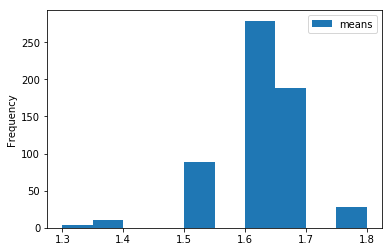

In [98]:
out_df.plot(bins=10, kind='hist')